# Aula 05 - Modelo de machine learning
**Final**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sns.set_style("ticks")

In [3]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


In [4]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [5]:
dados.shape

(23814, 877)

In [6]:
dados['tratamento']

0           com_droga
1           com_droga
2           com_droga
3           com_droga
4           com_droga
             ...     
23809       com_droga
23810       com_droga
23811    com_controle
23812       com_droga
23813       com_droga
Name: tratamento, Length: 23814, dtype: object

In [7]:
dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [8]:
dados['tempo'].unique()

array([24, 72, 48], dtype=int64)

In [9]:
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [10]:
dados['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [11]:
dados['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

In [12]:
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [13]:
dados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [14]:
dados['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

In [15]:
dados['dose'].value_counts(normalize = True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

In [16]:
dados_filtrados = dados[dados['g-0'] > 0]
dados_filtrados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,...,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


In [17]:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

In [18]:
cod_compostos = dados['composto'].value_counts().index[0:5]
cod_compostos

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

In [19]:
dados.query('composto in @cod_compostos')

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,...,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,...,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,...,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,...,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,...,1.2470,0.9569,-0.2065,-0.4918,0.7863,0.0504,0.8813,0.7757,-0.5272,0.7082
23802,id_fff3976bd,com_droga,24,D1,87d714366,3.2890,2.1270,0.9770,2.0490,2.3170,...,-8.6300,-8.1490,-6.2900,-8.0970,-8.7330,-2.3780,-8.4480,-4.4550,-5.7930,-3.7000
23805,id_fff6df1c5,com_droga,48,D2,5628cb3ee,1.7380,-1.2900,-0.4533,-1.1640,-0.4841,...,0.2865,0.5974,-0.2727,0.1188,1.0770,-1.0250,0.1516,0.4503,-0.6312,-0.8302
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808


In [20]:
len(dados['g-0'].unique())

14367

In [21]:
dados['g-0'].min()

-5.513

In [22]:
dados['g-0'].max()

10.0

In [23]:
dados.describe()

,tempo,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


In [24]:
dados[['g-0', 'g-1']]

,g-0,g-1
0,1.0620,0.5577
1,0.0743,0.4087
2,0.6280,0.5817
3,-0.5138,-0.2491
4,-0.3254,-0.4009
...,...,...
23809,0.1394,-0.0636
23810,-1.3260,0.3478
23811,0.3942,0.3756
23812,0.6660,0.2324


In [25]:
dados.loc[:,'g-0':'g-771'].describe()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,...,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,...,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,...,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,...,-0.433875,-0.502250,-0.537075,-0.508775,-0.606175,-0.506200,-0.353100,-0.544600,-0.554400,-0.523800
50%,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,0.160450,...,0.059600,-0.005900,-0.013600,-0.027700,-0.011850,0.009900,0.005400,0.000600,0.028700,-0.006500
75%,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,0.697775,...,0.648500,0.492150,0.522500,0.457000,0.483000,0.511175,0.409075,0.498500,0.496400,0.536950
max,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,6.433000,...,10.000000,9.552000,10.000000,8.346000,5.444000,6.317000,10.000000,5.911000,10.000000,10.000000


In [26]:
pd.crosstab(dados['dose'], dados['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [27]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'])
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index')
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [28]:
dados[['g-0', 'g-3']]

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


In [29]:
dados.loc[:,'g-0':'g-771'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.023752,-0.164868,0.404440,0.317500,-0.225094,0.124425,0.115579,-0.172727,-0.363673,0.250713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g-767,-0.052622,-0.003378,-0.053149,-0.179370,0.124425,-0.081016,-0.000886,0.137336,-0.101191,-0.013157,...,-0.010391,-0.180252,0.003976,-0.027425,0.153722,1.000000,-0.048393,0.065450,0.008603,-0.001136
g-768,0.300241,-0.030756,0.115415,0.028452,0.115579,-0.139000,-0.005791,-0.419437,-0.209968,-0.291836,...,0.077292,0.000048,0.403211,0.241509,-0.250512,-0.048393,1.000000,0.079364,-0.382607,0.351651
g-769,-0.127375,-0.006866,0.014489,-0.206077,-0.172727,-0.068537,-0.278587,-0.082554,0.268571,0.037013,...,0.020662,0.071082,0.013235,0.021152,0.151940,0.065450,0.079364,1.000000,0.135853,-0.083713
g-770,-0.514201,-0.095108,-0.078661,-0.002142,-0.363673,0.144631,-0.143428,0.402451,0.441011,0.415967,...,0.014331,-0.010849,-0.498222,-0.489116,0.284882,0.008603,-0.382607,0.135853,1.000000,-0.425063


In [30]:
corr = dados.loc[:,'g-0':'g-50'].corr()
corr

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,...,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,-0.499815,-0.203828,0.021582,-0.023423,-0.119687,0.530238,0.039827,0.238235,0.310583,-0.560201
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.110238,0.133896,0.161186,-0.092498,0.031993,0.097674,-0.012420,0.029064,-0.106349,-0.028870
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,-0.109646,-0.121433,-0.086435,0.021241,-0.036105,0.142712,-0.009575,0.039119,0.052003,-0.140002
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,-0.047136,-0.010941,-0.168398,-0.001770,0.065444,0.082046,0.297146,0.173796,0.072970,-0.233491
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.373390,0.071462,0.185361,-0.105936,-0.033695,0.355833,-0.060724,0.006138,0.114748,-0.315675
g-5,-0.165478,-0.151590,0.018516,0.042231,-0.057449,1.000000,0.083620,0.102345,0.073885,0.126561,...,0.206885,0.120727,-0.031065,-0.047988,0.090507,-0.176810,0.023328,0.039471,-0.127953,0.128877
g-6,0.238348,-0.122541,0.015190,-0.043177,0.206405,0.083620,1.000000,0.030544,-0.212292,-0.134739,...,-0.006081,-0.170005,0.137326,0.053565,-0.003568,0.094446,-0.045317,-0.074863,0.104435,0.026171
g-7,-0.374451,0.144537,-0.144205,-0.175692,-0.032748,0.102345,0.030544,1.000000,0.278085,0.288780,...,0.375000,0.238965,0.278872,-0.067301,0.164081,-0.362947,-0.048746,-0.394381,-0.323902,0.576532
g-8,-0.604212,-0.009973,-0.128029,-0.086167,-0.474828,0.073885,-0.212292,0.278085,1.000000,0.330284,...,0.538558,0.182810,0.046310,0.045865,0.138570,-0.528122,-0.122435,-0.086971,-0.348920,0.489859
g-9,-0.428779,-0.047558,-0.081332,-0.014052,-0.274167,0.126561,-0.134739,0.288780,0.330284,1.000000,...,0.313713,0.139294,-0.064036,0.004905,0.108596,-0.342196,0.133420,-0.147974,-0.184057,0.412596


In [31]:
corr_celular = dados.loc[:,'c-0':'c-50'].corr()
corr_celular

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,...,c-41,c-42,c-43,c-44,c-45,c-46,c-47,c-48,c-49,c-50
c-0,1.000000,0.827336,0.848472,0.798830,0.840695,0.844469,0.811946,0.793171,0.842977,0.759971,...,0.848941,0.847747,0.827377,0.847072,0.824247,0.816332,0.819386,0.778280,0.792811,0.797689
c-1,0.827336,1.000000,0.901416,0.808364,0.879258,0.869569,0.876924,0.793199,0.879892,0.812345,...,0.870896,0.891842,0.869508,0.851121,0.858537,0.828145,0.854667,0.853745,0.845159,0.839386
c-2,0.848472,0.901416,1.000000,0.830759,0.909991,0.882794,0.898819,0.812980,0.896087,0.821522,...,0.889876,0.909086,0.886977,0.880717,0.875814,0.854217,0.874174,0.863002,0.853704,0.848724
c-3,0.798830,0.808364,0.830759,1.000000,0.831523,0.829550,0.805506,0.752940,0.830369,0.765626,...,0.821351,0.838118,0.821934,0.813087,0.806219,0.808859,0.812784,0.804207,0.818632,0.821138
c-4,0.840695,0.879258,0.909991,0.831523,1.000000,0.883526,0.893285,0.808096,0.888384,0.822614,...,0.880368,0.913242,0.875934,0.878659,0.869324,0.862019,0.862095,0.862338,0.855029,0.851843
c-5,0.844469,0.869569,0.882794,0.829550,0.883526,1.000000,0.863932,0.794140,0.875615,0.810827,...,0.880703,0.897040,0.876421,0.860547,0.855910,0.841310,0.862328,0.861956,0.851853,0.864223
c-6,0.811946,0.876924,0.898819,0.805506,0.893285,0.863932,1.000000,0.796485,0.873232,0.839685,...,0.895083,0.908299,0.860556,0.874571,0.873974,0.828976,0.863283,0.857008,0.847009,0.825720
c-7,0.793171,0.793199,0.812980,0.752940,0.808096,0.794140,0.796485,1.000000,0.812357,0.728066,...,0.817912,0.832790,0.783834,0.838290,0.811981,0.779971,0.799859,0.766085,0.766224,0.760949
c-8,0.842977,0.879892,0.896087,0.830369,0.888384,0.875615,0.873232,0.812357,1.000000,0.827942,...,0.877598,0.902105,0.868428,0.868056,0.867145,0.844069,0.878245,0.859035,0.858434,0.846038
c-9,0.759971,0.812345,0.821522,0.765626,0.822614,0.810827,0.839685,0.728066,0.827942,1.000000,...,0.815802,0.852711,0.795000,0.808868,0.827258,0.782585,0.845719,0.811122,0.818514,0.796463


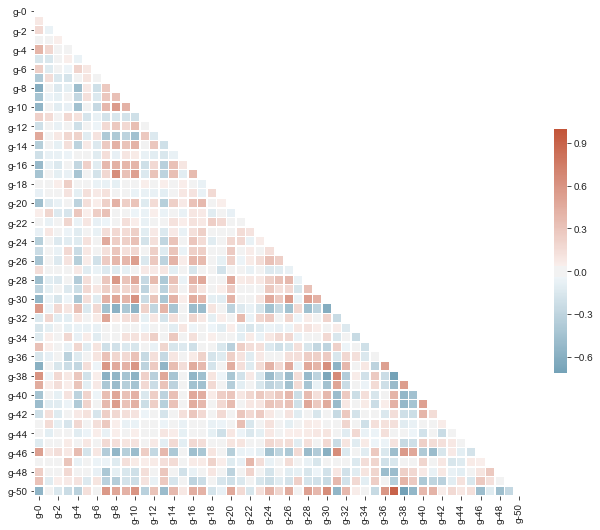

In [32]:
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

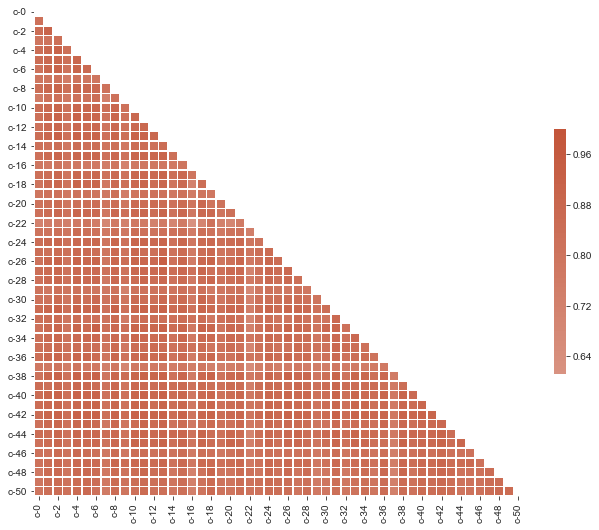

In [33]:
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Análise de dados

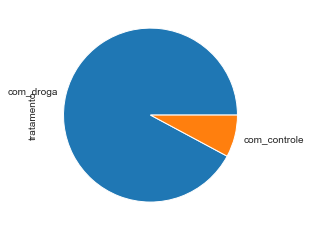

In [34]:
dados['tratamento'].value_counts().plot.pie()

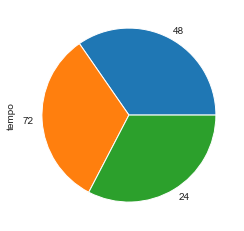

In [35]:
dados['tempo'].value_counts().plot.pie()

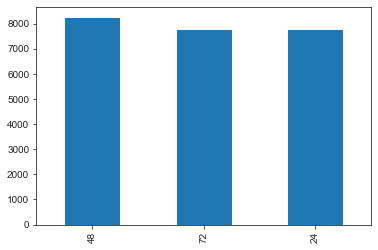

In [36]:
dados['tempo'].value_counts().plot.bar()

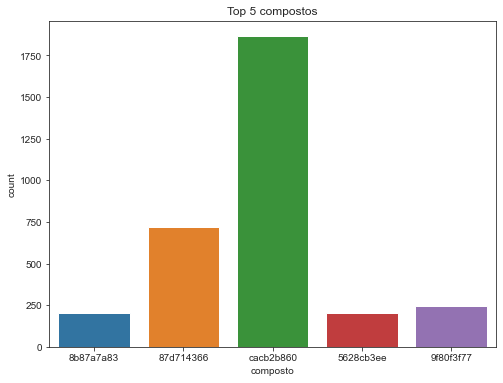

In [37]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x = 'composto', data=dados.query('composto in @cod_compostos'))
ax.set_title('Top 5 compostos')
plt.show()

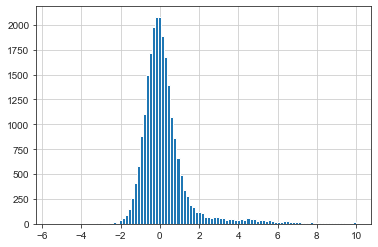

In [38]:
dados['g-0'].hist(bins = 100)

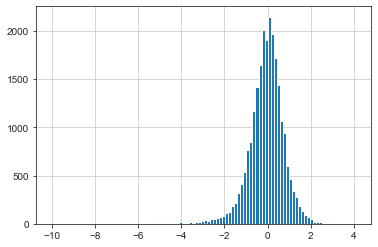

In [39]:
dados['g-19'].hist(bins = 100)

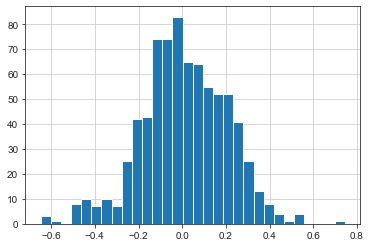

In [40]:
dados.loc[:,'g-0':'g-771'].describe().T['mean'].hist(bins=30)

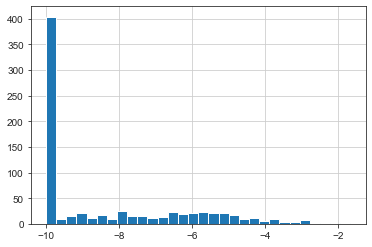

In [41]:
dados.loc[:,'g-0':'g-771'].describe().T['min'].hist(bins=30)

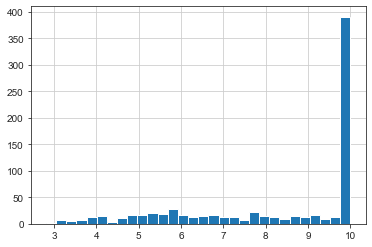

In [42]:
dados.loc[:,'g-0':'g-771'].describe().T['max'].hist(bins=30)

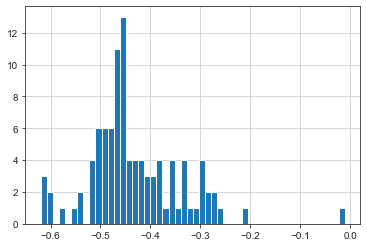

In [43]:
dados.loc[:,'c-0':'c-99'].describe().T['mean'].hist(bins=50)

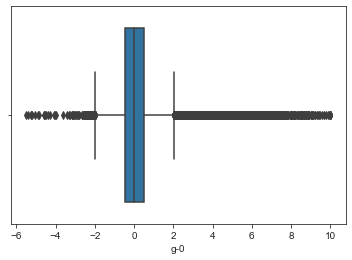

In [44]:
sns.boxplot(x='g-0' , data=dados)

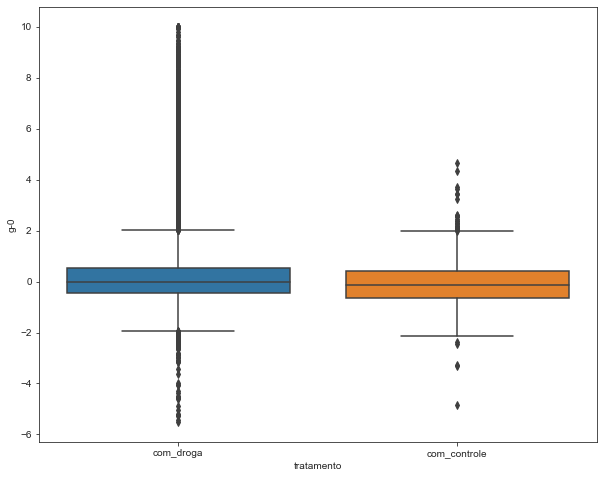

In [45]:
plt.figure(figsize=(10,8))
sns.boxplot(y='g-0', x='tratamento' , data=dados)

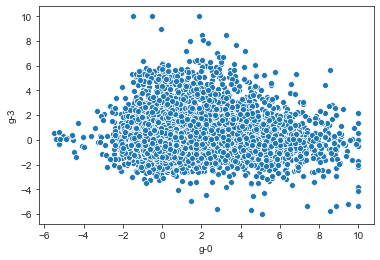

In [46]:
sns.scatterplot(x='g-0', y = 'g-3', data=dados)

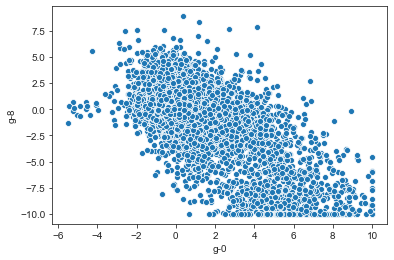

In [47]:
sns.scatterplot(x='g-0', y = 'g-8', data=dados)

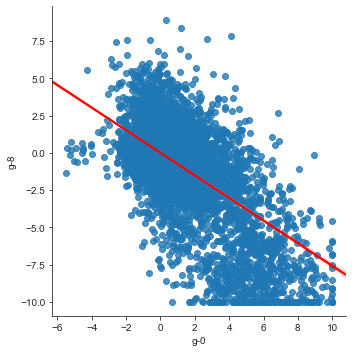

In [48]:
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'})

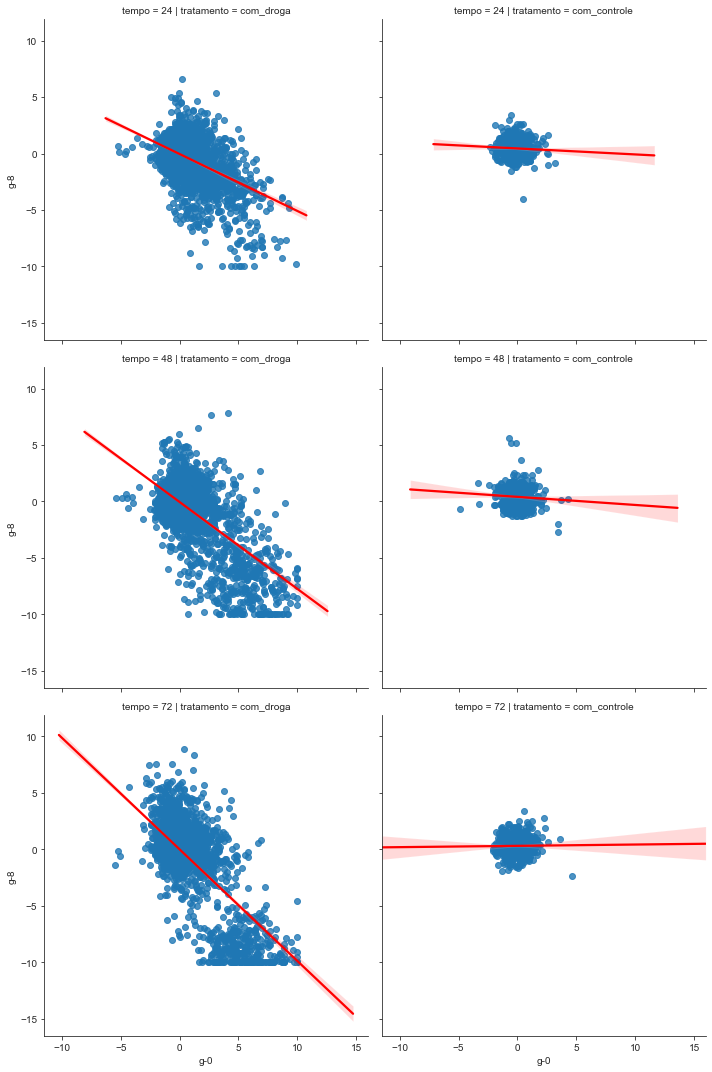

In [49]:
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'}, col='tratamento', row='tempo')

In [50]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
dados_resultados['acetylcholine_receptor_agonist'].unique()

array([0, 1], dtype=int64)

In [52]:
dados_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


In [53]:
contagem_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [54]:
dados_resultados.drop('id', axis=1).sum(axis=1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

In [55]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
dados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [57]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['n_moa'] != 0

0         True
1        False
2         True
3        False
4         True
         ...  
23809     True
23810     True
23811    False
23812     True
23813    False
Name: n_moa, Length: 23814, dtype: bool

In [58]:
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


In [59]:
dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [60]:
dados_combinados.query('tratamento == "com_controle"' )['ativo_moa'].value_counts()
dados_combinados.query('tratamento == "com_droga"' )['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

In [61]:
composto_principal = dados_combinados['composto'].value_counts().index[:5]
composto_principal

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

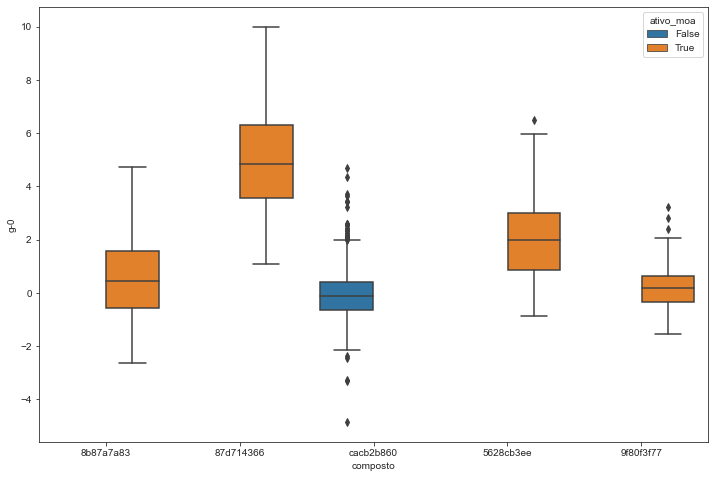

In [62]:
plt.figure(figsize=(12,8))
sns.boxplot(data = dados_combinados.query('composto in @composto_principal'), y= 'g-0', x='composto', hue='ativo_moa')

# Modelo de machine learning

In [63]:
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [64]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


In [65]:
# Treino e teste

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']

In [66]:
x.shape

(23814, 872)

In [67]:
y.shape

(23814,)

In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20, stratify = y)

In [69]:
x_train.shape

(19051, 872)

In [70]:
y_train.shape

(19051,)

In [71]:
x_test.shape

(4763, 872)

In [72]:
y_test.shape

(4763,)

**Modelo 1 - Regressão logística**

In [73]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(max_iter = 1000)
model_logistic_fit = model_logistic.fit(x_train, y_train)
model_logistic_scor = model_logistic.score(x_test, y_test)
model_logistic_scor

0.6321646021415075

**Modelo 2 - Dummy**

In [74]:
from sklearn.dummy import DummyClassifier

model_dummy = DummyClassifier("most_frequent")
model_dummy_fit = model_dummy.fit(x_train, y_train)
model_dummy_pred = model_dummy.predict(x_test)
model_dummy_scor = model_dummy.score(y_test, model_dummy_pred)
model_dummy_scor

C:\Users\RafaelHenriqueGallo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass strategy=most_frequent as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


1.0

In [75]:
dados_combinados['ativo_moa'].value_counts(normalize=True)

True     0.60666
False    0.39334
Name: ativo_moa, dtype: float64

**Modelo 3 - Decision Tree**

In [76]:
from sklearn.tree import DecisionTreeClassifier

tree_decision = DecisionTreeClassifier(max_depth = 3)
tree_decision_fit = tree_decision.fit(x_train, y_train)
tree_decision_pred = tree_decision.predict(x_train)
tree_decision_scor = tree_decision.score(x_test, y_test)
tree_decision_scor

0.6285954230526979

**Gráfico da arvore**

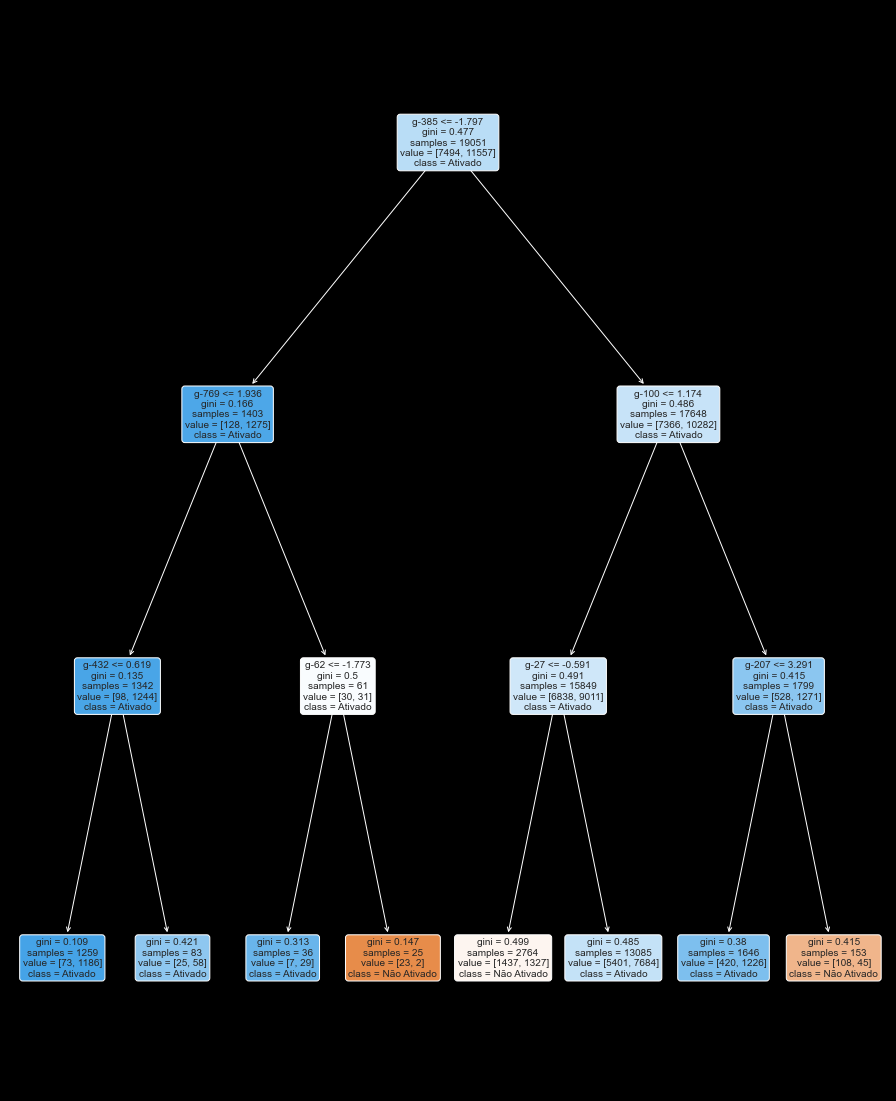

In [77]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(15.8, 20), facecolor = "k")

tree.plot_tree(tree_decision, ax = ax, fontsize = 10, rounded=True, filled=True,
              feature_names= x_train.columns,
              class_names = ["Não Ativado", "Ativado"])

plt.show()

**Modelo 3 - Random Forest**

In [78]:
from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier()
model_random_forest_fit = model_random_forest.fit(x_train, y_train)
#model_random_forest_pred = model_random_forest.predict(x_train, y_train)
model_random_forest_scor = model_random_forest.score(x_train, y_train)
model_random_forest_scor

1.0

**Modelo Extra**

In [79]:
test = []
train = []

for i in range(1,15):
    tree_decision = DecisionTreeClassifier(max_depth = i)
    tree_decision_fit = tree_decision.fit(x_train, y_train)
    test.append(tree_decision.score(x_test, y_test))
    train.append(tree_decision.score(x_train, y_train))

In [80]:
test

[0.6067604450976275,
 0.6067604450976275,
 0.6285954230526979,
 0.6231366785639303,
 0.630065085030443,
 0.6321646021415075,
 0.6298551333193365,
 0.6227167751417174,
 0.633844215830359,
 0.6309048918748688,
 0.6317446987192946,
 0.6292252781860173,
 0.6222968717195045,
 0.612639093008608]

In [81]:
train

[0.6066348223190384,
 0.6066348223190384,
 0.6168180148023725,
 0.6241142197259987,
 0.6358721326964464,
 0.6384966668416356,
 0.6557661015169808,
 0.6637971760012598,
 0.6833237100414676,
 0.7005931447168128,
 0.7204346228544434,
 0.7394362500656133,
 0.7630045666894126,
 0.7869928087764422]

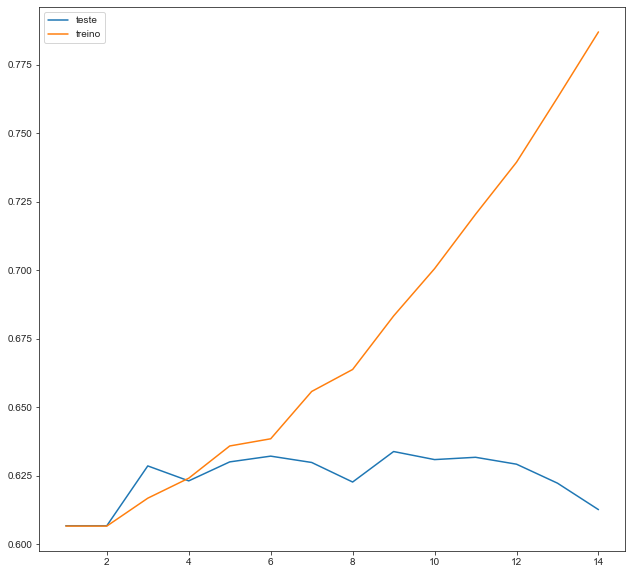

In [82]:
plt.figure(figsize=(10.5, 10))

ax = sns.lineplot(x=range(1,15), y = test, label='teste')
ax = sns.lineplot(x=range(1,15), y = train, label='treino')

In [83]:
pd.get_dummies(dados_combinados['tratamento'])

,com_controle,com_droga
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
23809,0,1
23810,0,1
23811,1,0
23812,0,1


In [84]:
pd.get_dummies(dados_combinados, columns=['tratamento', 'dose', 'tempo'])

,id,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,...,c-99,n_moa,ativo_moa,tratamento_com_controle,tratamento_com_droga,dose_D1,dose_D2,tempo_24,tempo_48,tempo_72
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,...,0.4176,1,True,0,1,1,0,1,0,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,...,0.7371,0,False,0,1,1,0,0,0,1
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,...,0.6931,3,True,0,1,1,0,0,1,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,...,-0.8154,0,False,0,1,1,0,0,1,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,...,0.7125,1,True,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,...,0.4680,1,True,0,1,0,1,1,0,0
23810,id_fffb70c0c,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,...,0.3689,1,True,0,1,0,1,1,0,0
23811,id_fffc1c3f4,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,...,0.3808,0,False,1,0,0,1,0,1,0
23812,id_fffcb9e7c,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,...,0.0740,1,True,0,1,1,0,1,0,0


In [85]:
dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)

,tratamento,tempo,dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,com_droga,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,com_droga,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,com_droga,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,com_droga,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,com_droga,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,com_droga,24,D2,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,com_droga,24,D2,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,com_controle,48,D2,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,com_droga,24,D1,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


# Desafios da aula 05

**Desafio 01: Tente outros modelos ou mude os parâmetros dos modelos que testamos em aula**

**Modelo 01 - Naive bayes**

In [86]:
from sklearn.naive_bayes import GaussianNB

model_naive_bayes = GaussianNB()
model_naive_bayes_fit = model_naive_bayes.fit(x_train, y_train)
model_naive_bayes_pred = model_naive_bayes.predict(x_train)
model_naive_bayes_scor = model_naive_bayes.score(x_train, y_train)
model_naive_bayes_scor

0.4673770405752979

In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_train, model_naive_bayes_pred))

              precision    recall  f1-score   support

       False       0.42      0.91      0.57      7494
        True       0.76      0.18      0.29     11557

    accuracy                           0.47     19051
   macro avg       0.59      0.55      0.43     19051
weighted avg       0.63      0.47      0.40     19051



**Modelo 02 - Validação cruzada**

In [90]:
from sklearn.model_selection import cross_validate

resultado = cross_validate(model_naive_bayes, x_train, y_train, cv=5,
               scoring=('accuracy'),
               return_train_score=True)

print(f"mean_train_score {np.mean(resultado['train_score']):.2f}")
print(f"mean_test_score {np.mean(resultado['test_score']):.2f}")

mean_train_score 0.47
mean_test_score 0.47


In [91]:
print(classification_report(y_train, model_naive_bayes_pred))

              precision    recall  f1-score   support

       False       0.42      0.91      0.57      7494
        True       0.76      0.18      0.29     11557

    accuracy                           0.47     19051
   macro avg       0.59      0.55      0.43     19051
weighted avg       0.63      0.47      0.40     19051



**Modelo 03 - Decision Tree**

In [92]:
from sklearn.tree import DecisionTreeClassifier

tree_decision = DecisionTreeClassifier(max_depth = 3)
tree_decision_fit = tree_decision.fit(x_train, y_train)
tree_decision_pred = tree_decision.predict(x_train)
tree_decision_scor = tree_decision.score(x_test, y_test)
tree_decision_scor

0.6285954230526979

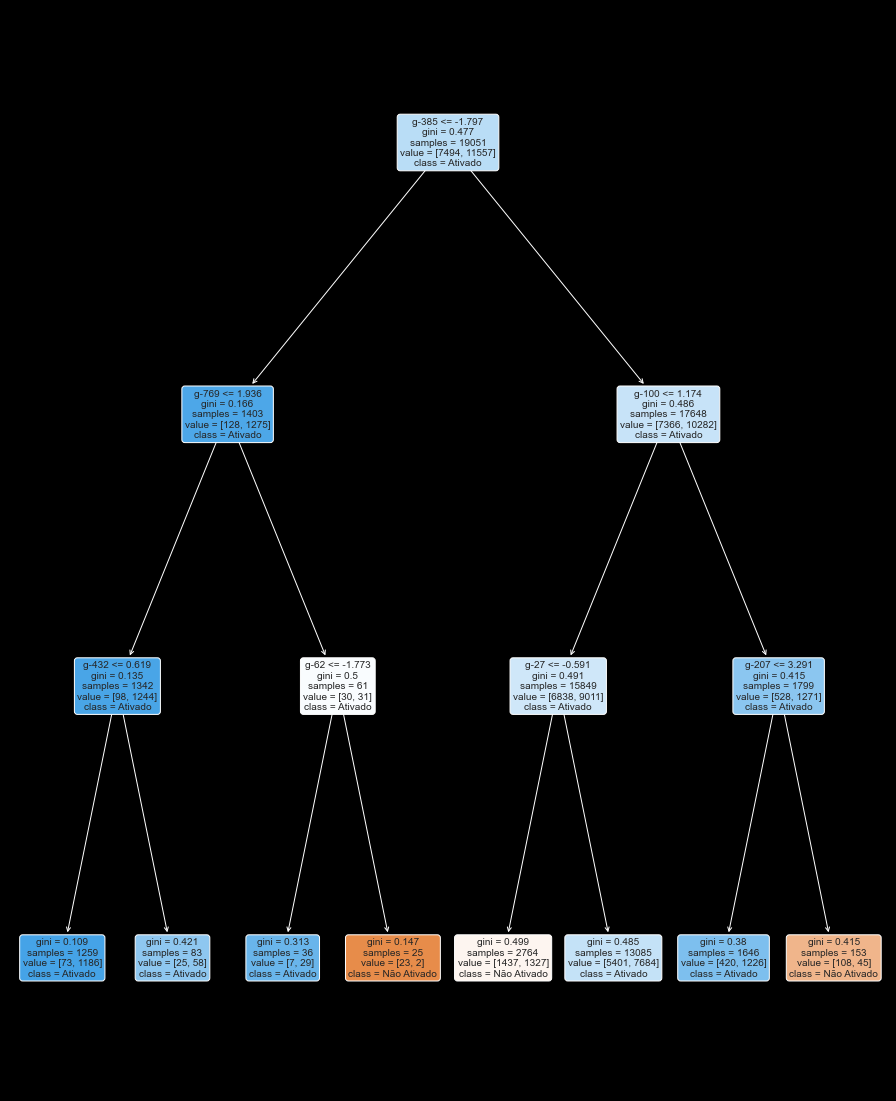

In [93]:
fig, ax = plt.subplots(figsize=(15.8, 20), facecolor = "k")

tree.plot_tree(tree_decision, ax = ax, fontsize = 10, rounded=True, filled=True,
              feature_names= x_train.columns,
              class_names = ["Não Ativado", "Ativado"])

plt.show()

In [94]:
print(classification_report(y_train, tree_decision_pred))

              precision    recall  f1-score   support

       False       0.53      0.21      0.30      7494
        True       0.63      0.88      0.74     11557

    accuracy                           0.62     19051
   macro avg       0.58      0.55      0.52     19051
weighted avg       0.59      0.62      0.56     19051



**Modelo 04 - K-NN**

In [95]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 3

model_knn = KNeighborsClassifier(n_neighbors)
model_knn_fit = model_knn.fit(x_train, y_train)
model_knn_pred = model_knn.predict(x_train)
model_knn_scor = model_knn.score(x_test, y_test)
model_knn_scor

0.6145286584085661

In [99]:
print(classification_report(y_train, model_knn_pred))

              precision    recall  f1-score   support

       False       0.78      0.71      0.74      7494
        True       0.82      0.87      0.84     11557

    accuracy                           0.81     19051
   macro avg       0.80      0.79      0.79     19051
weighted avg       0.80      0.81      0.80     19051



**Desafio 02: Teste outros problemas (perguntas). 0, 1 ou +**

In [100]:
x = dados_combinados.loc[:,'g-0':'c-99']
y = dados_combinados['tempo'].map({24:0,48:1,72:2})

In [101]:
x.shape

(23814, 872)

In [102]:
y.shape

(23814,)

In [107]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 376)

**Modelo 01 - Decision Tree**

In [110]:
tree_decision = DecisionTreeClassifier(max_depth = 3)
tree_decision_fit = tree_decision.fit(x_treino, y_treino)
tree_decision_pred = tree_decision.predict(x_treino)
tree_decision_scor = tree_decision.score(x_teste, y_teste)
tree_decision_scor

0.4457274826789838

In [113]:
resultado = cross_validate(tree_decision, x_treino, y_treino, cv=5,
               scoring=('accuracy'),
               return_train_score=True)

print(f"mean_train_score {np.mean(resultado['train_score']):.2f}")
print(f"mean_test_score {np.mean(resultado['test_score']):.2f}")

mean_train_score 0.44
mean_test_score 0.44


In [115]:
modelo_rlogistica2 = LogisticRegression(solver='newton-cg')
modelo_rlogistica2.fit(x_treino, y_treino)
modelo_rlogistica2.score(x_teste, y_teste)

0.686122191895864

In [116]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

C:\Users\RafaelHenriqueGallo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass strategy=most_frequent as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


0.3464203233256351

**Desafio 03: Escolha a droga mais utilizada e tente criar um modelo para prever está label.**

A droga mais utilizada é a mais presente na base de dados. Desta forma, a base de dados é altamente desbalanceada. O algoritmo de machine learning pode simplesmente "achar" que é melhor classificar o resultado como sendo a droga mais frequente. Por isso, decidimos criar um algoritmo que diferencia as drogas 8b87a7a83 e 5628cb3ee que possuem um número de elementos semelhante.

Aqui modificamos o x. Se colocamos mais colunas de g e c o algoritmo consegue 100% de taxa de acerto. A diferença da ativação entre as duas drogas é muito grande e fácil do algoritmo identificar.

In [119]:
dados_combinados['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
29d24570f       1
cf21e6ee0       1
f5c443039       1
f19d8c43b       1
7179d2160       1
Name: composto, Length: 3289, dtype: int64

In [118]:
dt_temporario = dados_combinados.query('composto in ["8b87a7a83", "5628cb3ee"]')
dt_temporario

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260,1,True
48,id_008b48693,com_droga,24,D1,5628cb3ee,2.5200,-2.0200,1.1710,2.0420,-1.8070,...,-0.3901,0.5272,-1.0650,0.0289,-0.2725,-0.1511,-0.4635,-0.1365,1,True
56,id_009379beb,com_droga,24,D1,5628cb3ee,4.7460,-3.9910,1.3950,1.8060,-0.7316,...,-0.1706,-0.2873,0.9902,0.6887,-0.7908,0.0828,-1.3720,0.4935,1,True
86,id_00f11ed38,com_droga,48,D2,8b87a7a83,0.0956,0.0837,0.7700,3.3160,-0.1528,...,0.3626,-0.4245,0.6524,0.9280,0.1830,-0.9431,-0.6608,1.0450,1,True
172,id_01e7ece50,com_droga,48,D1,8b87a7a83,2.8910,0.5810,-0.6697,3.2540,0.3011,...,1.1990,0.5577,1.2780,0.3697,-0.3175,0.2708,-1.8680,-0.1465,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23733,id_ff28ef497,com_droga,72,D2,8b87a7a83,1.8910,2.5570,1.5660,2.5440,-1.8690,...,-0.3885,0.0053,0.6687,-1.6400,-1.7440,-2.3260,-3.6080,-1.3310,1,True
23765,id_ff7c78810,com_droga,48,D2,8b87a7a83,0.2546,-0.7637,1.6530,2.9120,-0.9216,...,1.1680,0.9989,-0.1970,0.9418,0.1500,0.0980,-0.9504,0.1686,1,True
23782,id_ffb12855e,com_droga,72,D2,8b87a7a83,-1.1920,-0.4798,-0.2600,3.0090,-0.7221,...,-0.5361,0.4695,1.0480,0.7965,0.1308,-0.2769,-1.3080,0.0740,1,True
23805,id_fff6df1c5,com_droga,48,D2,5628cb3ee,1.7380,-1.2900,-0.4533,-1.1640,-0.4841,...,-0.2727,0.1188,1.0770,-1.0250,0.1516,0.4503,-0.6312,-0.8302,1,True


**Modelo de machine learning melhorado**


In [120]:
x = dt_temporario.loc[:,'g-0':'g-10'] 
y = dt_temporario['composto'].map({'8b87a7a83': 0, '5628cb3ee': 1})

In [121]:
x.shape

(405, 11)

In [122]:
y.shape

(405,)

In [123]:
# Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 376) 

In [124]:
x_train.shape

(324, 11)

In [125]:
y_train.shape

(324,)

In [126]:
x_test.shape

(81, 11)

In [127]:
y_test.shape

(81,)

**Modelo 01 - Naive bayes**

In [133]:
model_naive_bayes = GaussianNB()
model_naive_bayes_fit = model_naive_bayes.fit(x_train, y_train)
model_naive_bayes_pred = model_naive_bayes.predict(x_test)
model_naive_bayes_scor = model_naive_bayes.score(x_train, y_train)
model_naive_bayes_scor

0.9691358024691358

In [163]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, model_naive_bayes_pred)
print("Acurácia - Naive bayes: %.2f" % (accuracy * 100))

Acurácia - Naive bayes: 91.36


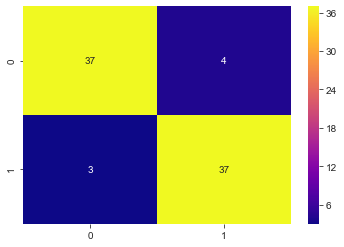

In [135]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, model_naive_bayes_pred)

matrix = sns.heatmap(matrix, cmap = 'plasma', annot = True, fmt='g')

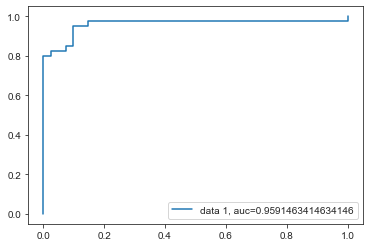

In [160]:
from sklearn import metrics

roc_g = model_naive_bayes.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [136]:
print(classification_report(y_test, model_naive_bayes_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        41
           1       0.90      0.93      0.91        40

    accuracy                           0.91        81
   macro avg       0.91      0.91      0.91        81
weighted avg       0.91      0.91      0.91        81



**Modelo 02 - Decision Tree**

In [139]:
tree_decision = DecisionTreeClassifier(max_depth = 3)
tree_decision_fit = tree_decision.fit(x_train, y_train)
tree_decision_pred = tree_decision.predict(x_test)
tree_decision_scor = tree_decision.score(x_test, y_test)
tree_decision_scor

0.8148148148148148

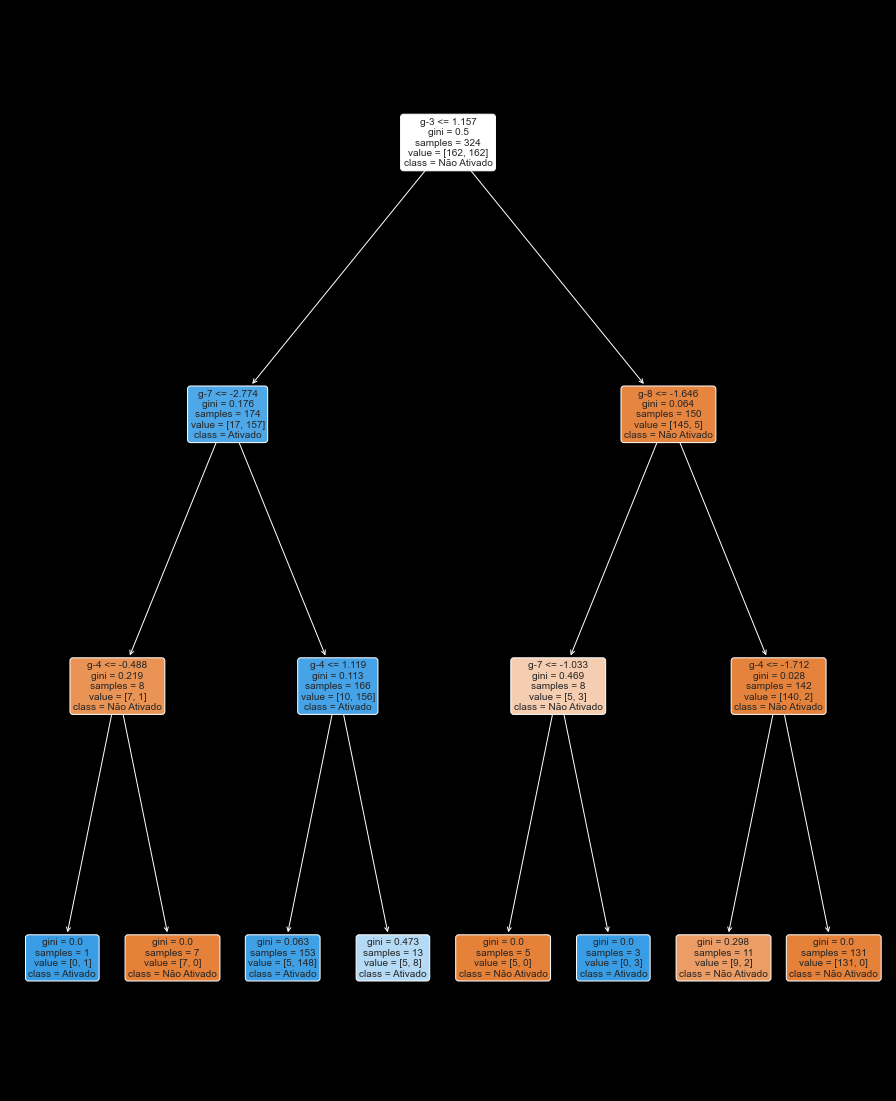

In [137]:
fig, ax = plt.subplots(figsize=(15.8, 20), facecolor = "k")

tree.plot_tree(tree_decision, ax = ax, fontsize = 10, rounded = True, filled = True,
              feature_names= x_train.columns,
              class_names = ["Não Ativado", "Ativado"])

plt.show()

In [164]:
accuracy = accuracy_score(y_test, tree_decision_pred)
print("Acurácia - Decision Tree: %.2f" % (accuracy * 100))

Acurácia - Decision Tree: 81.48


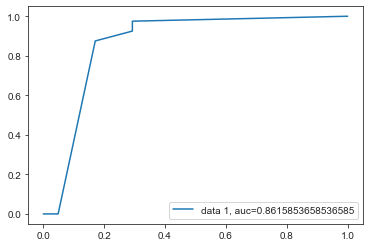

In [167]:
roc_g = tree_decision.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

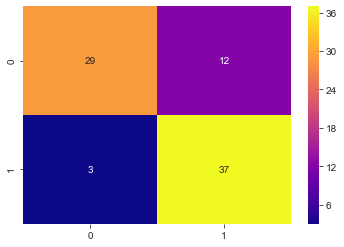

In [141]:
matrix = confusion_matrix(y_test, tree_decision_pred)

matrix = sns.heatmap(matrix, cmap = 'plasma', annot = True, fmt='g')

In [142]:
print(classification_report(y_test, tree_decision_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.79        41
           1       0.76      0.93      0.83        40

    accuracy                           0.81        81
   macro avg       0.83      0.82      0.81        81
weighted avg       0.83      0.81      0.81        81



**Modelo 03 - Regressão logística**

In [143]:
model_logistic = LogisticRegression(max_iter = 20000)
model_logistic_fit = model_logistic.fit(x_train, y_train)
model_logistic_scor = model_logistic.score(x_test, y_test)
model_logistic_pred = model_logistic.predict(x_test)
model_logistic_scor

0.9382716049382716

In [165]:
accuracy = accuracy_score(y_test, model_logistic_pred)
print("Acurácia - Regressão logística: %.2f" % (accuracy * 100))

Acurácia - Regressão logística: 93.83


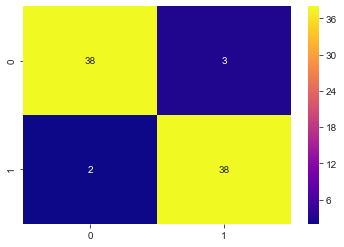

In [145]:
matrix = confusion_matrix(y_test, model_logistic_pred)

matrix = sns.heatmap(matrix, cmap = 'plasma', annot = True, fmt='g')

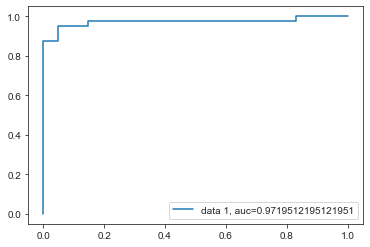

In [168]:
roc_g = model_logistic.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [146]:
print(classification_report(y_test, model_logistic_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.93      0.95      0.94        40

    accuracy                           0.94        81
   macro avg       0.94      0.94      0.94        81
weighted avg       0.94      0.94      0.94        81



**Modelo 04 - Random Forest**

In [148]:
model_random_forest = RandomForestClassifier()
model_random_forest_fit = model_random_forest.fit(x_train, y_train)
model_random_forest_pred = model_random_forest.predict(x_test)
model_random_forest_scor = model_random_forest.score(x_train, y_train)
model_random_forest_scor

1.0

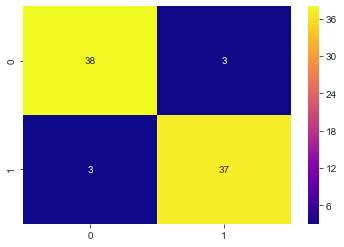

In [150]:
matrix_random_forest = confusion_matrix(y_test, model_random_forest_pred)

matrix = sns.heatmap(matrix_random_forest, cmap = 'plasma', annot=True, fmt='g')

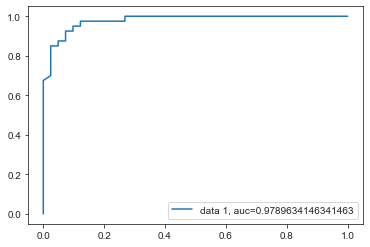

In [169]:
roc_g = model_random_forest.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  roc_g)
auc = metrics.roc_auc_score(y_test, roc_g)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [166]:
accuracy = accuracy_score(y_test, model_random_forest_pred)
print("Acurácia - Random Forest: %.2f" % (accuracy * 100))

Acurácia - Random Forest: 92.59


In [153]:
print(classification_report(y_test, model_random_forest_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        41
           1       0.93      0.93      0.93        40

    accuracy                           0.93        81
   macro avg       0.93      0.93      0.93        81
weighted avg       0.93      0.93      0.93        81



# Resultados finais

In [157]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Modelo - 01 Naive bayes")
print("\n")
print("Precision - Naive bayes = {}".format(precision_score(y_test, model_naive_bayes_pred, average='macro')))
print("Recall - Naive bayes = {}".format(recall_score(y_test, model_naive_bayes_pred, average='macro')))
print("Accuracy - Naive bayes = {}".format(accuracy_score(y_test, model_naive_bayes_pred)))
print("F1 Score - Naive bayes = {}".format(f1_score(y_test, model_naive_bayes_pred, average='macro')))
print("\n")

print("Modelo - 02 Decision Tree")
print("\n")
print("Precision - Random Forest = {}".format(precision_score(y_test, tree_decision_pred, average='macro')))
print("Recall - Random Forest = {}".format(recall_score(y_test, tree_decision_pred, average='macro')))
print("Accuracy - Random Forest = {}".format(accuracy_score(y_test, tree_decision_pred)))
print("F1 Score - Random Forest = {}".format(f1_score(y_test, tree_decision_pred, average='macro')))
print("\n")

print("Modelo - 03 Regressão logística")
print("\n")
print("Precision - Regressão logística = {}".format(precision_score(y_test, model_logistic_pred, average='macro')))
print("Recall - Regressão logística = {}".format(recall_score(y_test, model_logistic_pred, average='macro')))
print("Accuracy - Regressão logística = {}".format(accuracy_score(y_test, model_logistic_pred)))
print("F1 Score - Regressão logística = {}".format(f1_score(y_test, model_logistic_pred, average='macro')))
print("\n")

print("Modelo - 04 Random Forest")
print("\n")

print("Precision - Random Forest = {}".format(precision_score(y_test, model_random_forest_pred, average='macro')))
print("Recall - Random Forest = {}".format(recall_score(y_test, model_random_forest_pred, average='macro')))
print("Accuracy - Random Forest = {}".format(accuracy_score(y_test, model_random_forest_pred)))
print("F1 Score - Random Forest = {}".format(f1_score(y_test, model_random_forest_pred, average='macro')))
print("\n")

Modelo - 01 Naive bayes


Precision - Naive bayes = 0.913719512195122
Recall - Naive bayes = 0.913719512195122
Accuracy - Naive bayes = 0.9135802469135802
F1 Score - Naive bayes = 0.9135802469135802


Modelo - 02 Decision Tree


Precision - Random Forest = 0.8306760204081632
Recall - Random Forest = 0.8161585365853659
Accuracy - Random Forest = 0.8148148148148148
F1 Score - Random Forest = 0.8129906110512544


Modelo - 03 Regressão logística


Precision - Regressão logística = 0.9384146341463415
Recall - Regressão logística = 0.9384146341463415
Accuracy - Regressão logística = 0.9382716049382716
F1 Score - Regressão logística = 0.9382716049382716


Modelo - 04 Random Forest


Precision - Random Forest = 0.9259146341463416
Recall - Random Forest = 0.9259146341463416
Accuracy - Random Forest = 0.9259259259259259
F1 Score - Random Forest = 0.9259146341463416




# Modelo de Hiper-parametros - Decision Tree Classifier

In [170]:
x = dt_temporario.loc[:,'g-0':'g-10'] 
y = dt_temporario['composto'].map({'8b87a7a83': 0, '5628cb3ee': 1})

In [172]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)

In [179]:
tree_decision = DecisionTreeClassifier(max_depth = 3)
tree_decision_fit = tree_decision.fit(x_train, y_train)
tree_decision_pred = tree_decision.predict(x_train)
tree_decision_scor = tree_decision.score(x_test, y_test)
tree_decision_scor

0.9113300492610837

In [180]:
from sklearn.model_selection import cross_validate

results = cross_validate(tree_decision, x_train, y_train, cv=5,
               scoring=('accuracy'),
               return_train_score=True)

print(f"mean_train_score {np.mean(results['train_score']):.2f}")
print(f"mean_test_score {np.mean(results['test_score']):.2f}")

mean_train_score 0.97
mean_test_score 0.87


In [181]:
print(classification_report(y_train, tree_decision_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       106
           1       0.96      0.98      0.97        96

    accuracy                           0.97       202
   macro avg       0.97      0.97      0.97       202
weighted avg       0.97      0.97      0.97       202



In [182]:
from sklearn.model_selection import GridSearchCV 

espaco_de_parametros = {
  "max_depth" : [3, 5],
  "min_samples_split" : [32, 64, 128],
  "min_samples_leaf" : [32, 64, 128],
  "criterion" : ["gini", "entropy"]
}

tree_decision = DecisionTreeClassifier()

clf = GridSearchCV(tree_decision, espaco_de_parametros, cv=5, return_train_score=True, scoring='accuracy')
search = clf.fit(x, y)
results_GridSearchCV = search.cv_results_
indice_melhores_parametros = search.best_index_
clf_pred_Grid = clf.predict(x_train)

print(f"mean_train_score {results_GridSearchCV['mean_train_score'][indice_melhores_parametros]:.2f}")
print(f"mean_test_score {results_GridSearchCV['mean_test_score'][indice_melhores_parametros]:.2f}")

mean_train_score 0.92
mean_test_score 0.92


In [185]:
SEED = 123456

In [183]:
results_GridSearchCV['params'][indice_melhores_parametros]

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 32,
 'min_samples_split': 64}

In [187]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
 
espaco_de_parametros = {
    "max_depth" : randint(1, 10),
    "min_samples_split" : randint(32, 129),
    "min_samples_leaf" : randint(32, 129),
    "criterion" : ["gini", "entropy"]
}

tree_decision = DecisionTreeClassifier()

clf = RandomizedSearchCV(tree_decision, espaco_de_parametros, random_state=SEED, cv=5, return_train_score=True, n_iter=10, scoring='accuracy')
search = clf.fit(x_train, y_train)
pred = clf.predict(x_train)

results_RandomizedSearchCV = search.cv_results_
indice_melhores_parametros = search.best_index_

print(f"mean_train_score {results_RandomizedSearchCV['mean_train_score'][indice_melhores_parametros]:.2f}")
print(f"mean_test_score {results_RandomizedSearchCV['mean_test_score'][indice_melhores_parametros]:.2f}")

mean_train_score 0.89
mean_test_score 0.88


In [188]:
results_RandomizedSearchCV['params'][indice_melhores_parametros]

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 79,
 'min_samples_split': 82}

In [207]:
print("GridSearchCV - Decision Tree")
print("\n")
print(classification_report(y_train, clf_pred_Grid))

GridSearchCV - Decision Tree


              precision    recall  f1-score   support

           0       0.91      0.96      0.94       106
           1       0.96      0.90      0.92        96

    accuracy                           0.93       202
   macro avg       0.93      0.93      0.93       202
weighted avg       0.93      0.93      0.93       202



In [208]:
print("RandomizedSearchCV - Decision Tree")
print("\n")
print(classification_report(y_train, pred))

RandomizedSearchCV - Decision Tree


              precision    recall  f1-score   support

           0       0.88      0.93      0.91       106
           1       0.92      0.86      0.89        96

    accuracy                           0.90       202
   macro avg       0.90      0.90      0.90       202
weighted avg       0.90      0.90      0.90       202

